In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/vesc/OneDrive - Equinor/Documents/01_IFP_ML/04_lithofacies_prediction/train.csv', sep=';')

In [3]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


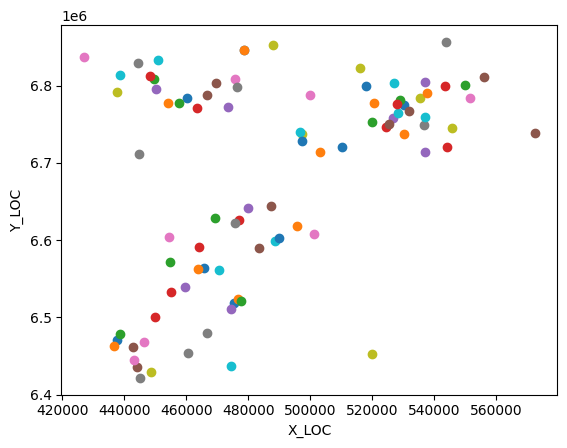

In [4]:
# Group the data by WELL and find the point with the minimum DEPTH
min_depth_points = data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# Plot the X-Y location
for _, point in min_depth_points.iterrows():
    plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'])

plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')

plt.show()


Subsetting the data

In [5]:
subset_data = data[(data['Y_LOC'] < 6700000) & (data['Y_LOC'] > 6500000)]
subset_data
num_wells = subset_data['WELL'].nunique()
well_counts = subset_data['WELL'].value_counts()
print(well_counts)


25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64


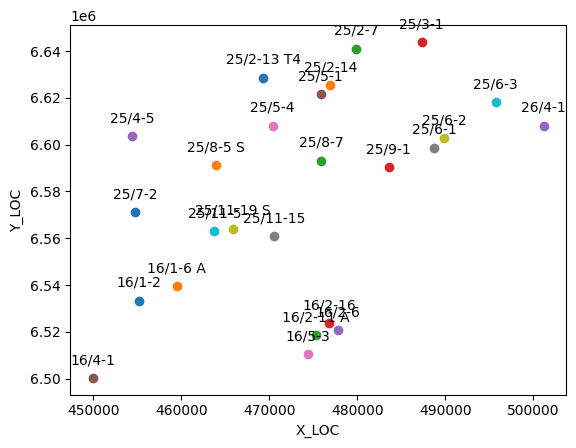

In [6]:
# Group the data by WELL and find the point with the minimum DEPTH
min_depth_points = subset_data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# Plot the X-Y location
for _, point in min_depth_points.iterrows():
    plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'])
    plt.annotate(point['WELL'], (point['X_LOC'], point['Y_LOC']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')

plt.show()

In [7]:
total_observations = subset_data.shape[0]
well_counts = subset_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)

Well Counts:
25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64
Total Observations: 307886
Total Wells: 25


Splitting the data into train and test sets. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


# Select only 2 random wells as test data
blind_wells = subset_data['WELL'].sample(n=2, random_state=42)
blind_data = subset_data[subset_data['WELL'].isin(blind_wells)]
train_data = subset_data[~subset_data['WELL'].isin(blind_wells)]


In [9]:
total_observations = train_data.shape[0]
well_counts = train_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)


Well Counts:
25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64
Total Observations: 283265
Total Wells: 23


In [10]:
total_observations = blind_data.shape[0]
well_counts = blind_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)

Well Counts:
25/8-5 S    14596
16/2-16     10025
Name: WELL, dtype: int64
Total Observations: 24621
Total Wells: 2


In [11]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

C:\Users\vesc\AppData\Local\Temp\ipykernel_8864\1664882687.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in train_counts.iteritems():
C:\Users\vesc\AppData\Local\Temp\ipykernel_8864\1664882687.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in test_counts.iteritems():


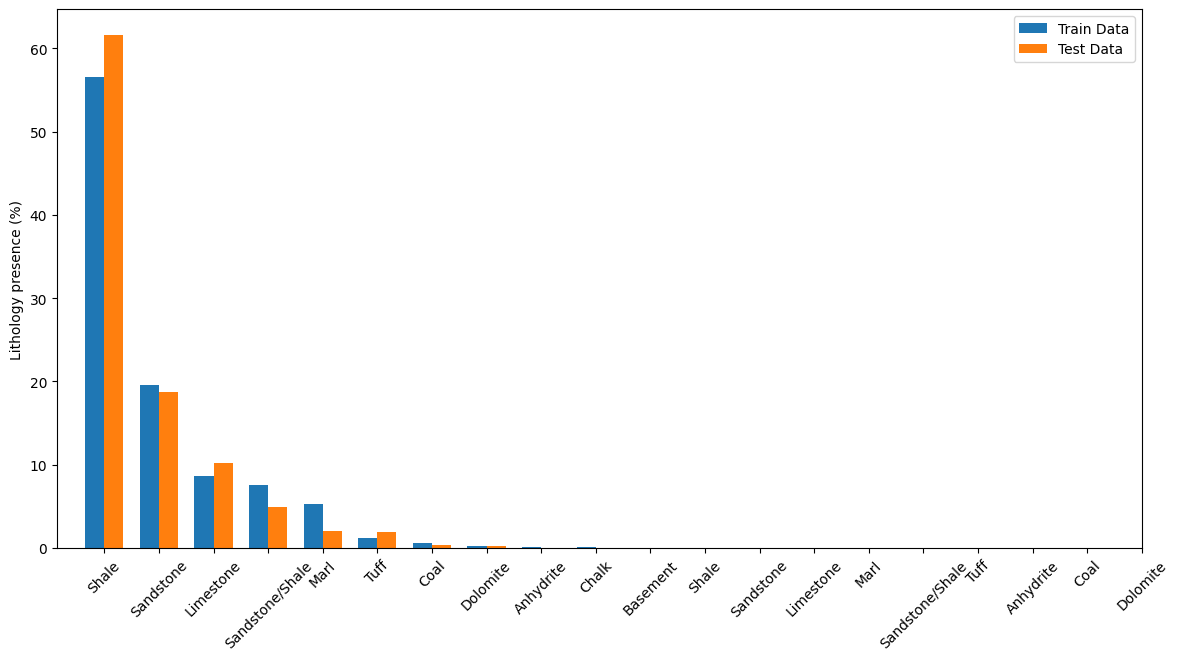

In [12]:
train_counts = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
test_counts = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

train_names = []
train_percentage = []
test_names = []
test_percentage = []

N_train = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
N_test = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

for item in train_counts.iteritems():
    train_names.append(lithology_keys[item[0]])
    train_percentage.append(float(item[1])/N_train*100)

for item in test_counts.iteritems():
    test_names.append(lithology_keys[item[0]])
    test_percentage.append(float(item[1])/N_test*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
width = 0.35  # width of the bars

ax.bar(x=np.arange(len(train_names)), height=train_percentage, width=width, label='Train Data')
ax.bar(x=np.arange(len(test_names)) + width, height=test_percentage, width=width, label='Blind Data')
ax.set_xticks(np.arange(len(train_names + test_names)) + width/2)
ax.set_xticklabels(train_names + test_names, rotation=45)
ax.set_ylabel('Lithology presence (%)')
ax.legend()


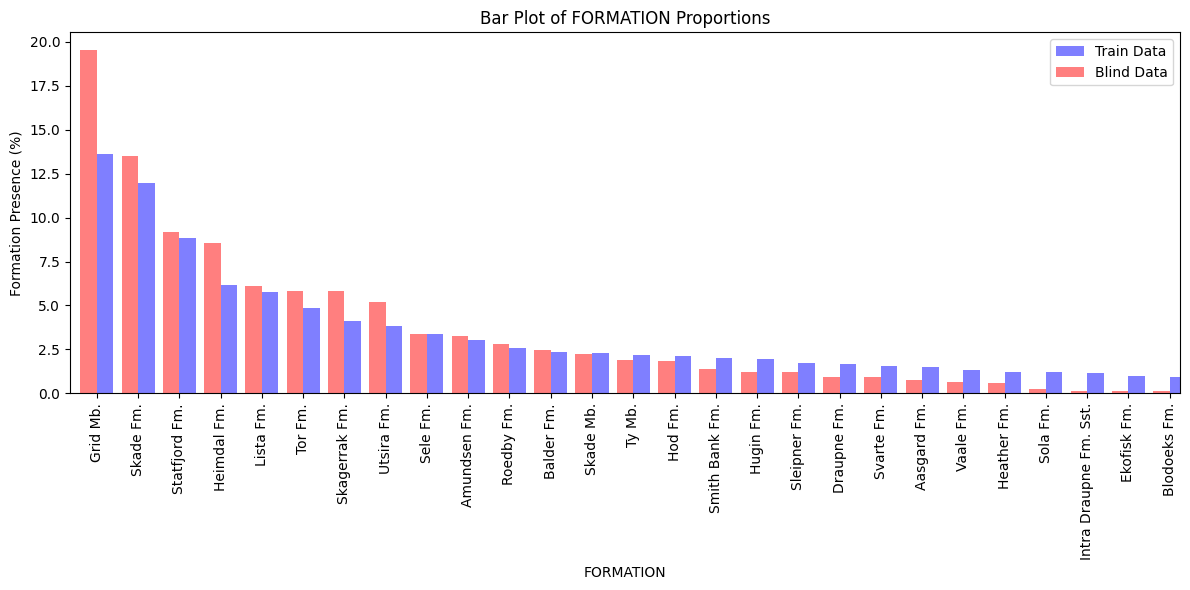

In [17]:
train_counts = train_data['FORMATION'].value_counts()
test_counts = blind_data['FORMATION'].value_counts()

train_proportions = train_counts / train_counts.sum()*100
test_proportions = test_counts / test_counts.sum()*100

fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

width = 0.4  # Adjust the width of the bars
train_proportions.plot(kind='bar', color='blue', alpha=0.5, label='Train Data', position=0, width=width)
test_proportions.plot(kind='bar', color='red', alpha=0.5, label='Blind Data', position=1, width=width)

ax.set_xlabel('FORMATION')
ax.set_ylabel('Formation Presence (%)')
ax.set_title('Bar Plot of FORMATION Proportions')
ax.legend()

plt.tight_layout()  # Add space between the bins

plt.show()


In [ ]:
train_data.to_csv('train_data.csv', index=False)
